In [28]:
# 导入类库
import operator

# 导入类库
import numpy as np
import pandas as pd
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import  set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

In [29]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # 替换sans-serif字体
plt.rcParams['axes.unicode_minus'] = False   # 解决坐标轴负数的负号显示问题

In [3]:
# import matplotlib.pyplot as plt

# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'

# 读取数据

In [68]:
dE=pd.read_csv('data/reshaped_Eucalyptus17.csv')
dR=pd.read_csv('data/reshaped_Rosewood17.csv')
dS=pd.read_csv('data/reshaped_Sandalwood17.csv')
df=pd.concat([dE,dR,dS],axis=0)
df.head()

,1_f1,1_f2,1_f3,1_f4,1_f5,1_f6,1_f7,1_f8,1_f9,1_f10,...,8_f30,8_f31,8_f32,8_f33,8_f34,8_f35,8_f36,8_f37,8_f38,label
0,0.520452,0.257833,0.478471,0.257833,-0.345439,31.0,1.0,1.0,2.0,23.056772,...,0.000027,5.014366,3.862448e-10,0.000020,5.180186,1.333720e-07,5.620632e-10,5.190003e-10,-2.188405e-06,Eucalyptus
1,0.518882,0.355147,0.358545,0.341536,-0.316187,28.0,26.0,26.0,27.0,16.392162,...,0.000029,4.354803,2.300409e-10,0.000015,4.602554,7.807195e-09,8.117576e-10,4.749334e-10,-3.474575e-07,Eucalyptus
2,0.517683,0.240760,0.469593,0.277770,-0.307011,32.0,26.0,37.0,2.0,22.622603,...,0.000025,4.890009,2.423259e-10,0.000016,5.307282,3.999528e-09,5.966199e-10,6.043611e-10,-2.403407e-07,Eucalyptus
3,0.516099,0.426934,0.532562,0.902948,-0.672302,0.0,578.0,421.0,576.0,0.000000,...,0.000039,4.485437,8.431736e-10,0.000029,4.904839,3.718396e-08,5.502194e-09,2.496090e-09,-1.053974e-06,Eucalyptus
4,0.515661,0.430449,0.289191,0.341250,-0.438418,27.0,26.0,26.0,36.0,12.253825,...,0.000015,3.695799,1.712271e-10,0.000013,4.373427,4.056752e-10,2.508028e-10,2.060360e-10,-4.311957e-08,Eucalyptus


In [69]:
df.shape

(2700, 305)

In [70]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

In [71]:
df

,1_f1,1_f2,1_f3,1_f4,1_f5,1_f6,1_f7,1_f8,1_f9,1_f10,...,8_f30,8_f31,8_f32,8_f33,8_f34,8_f35,8_f36,8_f37,8_f38,label
0,0.520452,0.257833,0.478471,0.257833,-0.345439,31.0,1.0,1.0,2.0,23.056772,...,0.000027,5.014366,3.862448e-10,0.000020,5.180186,1.333720e-07,5.620632e-10,5.190003e-10,-2.188405e-06,0
1,0.518882,0.355147,0.358545,0.341536,-0.316187,28.0,26.0,26.0,27.0,16.392162,...,0.000029,4.354803,2.300409e-10,0.000015,4.602554,7.807195e-09,8.117576e-10,4.749334e-10,-3.474575e-07,0
2,0.517683,0.240760,0.469593,0.277770,-0.307011,32.0,26.0,37.0,2.0,22.622603,...,0.000025,4.890009,2.423259e-10,0.000016,5.307282,3.999528e-09,5.966199e-10,6.043611e-10,-2.403407e-07,0
3,0.516099,0.426934,0.532562,0.902948,-0.672302,0.0,578.0,421.0,576.0,0.000000,...,0.000039,4.485437,8.431736e-10,0.000029,4.904839,3.718396e-08,5.502194e-09,2.496090e-09,-1.053974e-06,0
4,0.515661,0.430449,0.289191,0.341250,-0.438418,27.0,26.0,26.0,36.0,12.253825,...,0.000015,3.695799,1.712271e-10,0.000013,4.373427,4.056752e-10,2.508028e-10,2.060360e-10,-4.311957e-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.503637,0.580181,0.722157,0.585283,-0.591359,31.0,26.0,12.0,27.0,10.607134,...,0.000012,4.014075,1.223309e-10,0.000011,4.365026,3.832140e-10,2.200991e-10,1.632063e-10,-3.600759e-08,2
896,0.503889,0.644622,0.379685,0.537811,-0.694952,26.0,26.0,37.0,27.0,3.545211,...,0.000031,5.825807,2.421651e-10,0.000016,5.173291,2.739924e-09,1.581903e-09,8.467388e-10,-1.000759e-07,2
897,0.527070,0.350024,0.758096,0.350024,-0.489371,1.0,1.0,1.0,2.0,0.000000,...,0.000040,3.728592,5.978294e-10,0.000024,4.120285,2.682062e-07,5.666084e-09,2.372889e-09,-2.993864e-06,2
898,0.524630,0.342249,0.238970,0.526532,-0.429717,29.0,26.0,37.0,36.0,17.549617,...,0.000034,4.727767,5.025930e-10,0.000022,5.124569,4.278942e-07,2.184993e-09,1.066271e-09,-3.900782e-06,2


In [72]:
df.isnull().sum()

1_f1     0
1_f2     0
1_f3     0
1_f4     0
1_f5     0
        ..
8_f35    0
8_f36    0
8_f37    0
8_f38    0
label    0
Length: 305, dtype: int64

In [73]:
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

1_f1     0
1_f2     0
1_f3     0
1_f4     0
1_f5     0
        ..
8_f35    0
8_f36    0
8_f37    0
8_f38    0
label    0
Length: 305, dtype: int64

In [74]:
X=df.drop(columns=['label'])
Y=df['label']

In [75]:
Y = Y.reset_index(drop=True)
Y

0       0
1       0
2       0
3       0
4       0
       ..
2695    2
2696    2
2697    2
2698    2
2699    2
Name: label, Length: 2700, dtype: int32

In [76]:
# min-max无量纲化
from sklearn.preprocessing import MinMaxScaler

# 创建一个MinMax缩放器
scaler = MinMaxScaler()

# 对数值型特征进行MinMax缩放
X_transform = scaler.fit_transform(X)

# 归一化
from sklearn.preprocessing import Normalizer

# 创建一个归一化器
normalizer = Normalizer()

X_transform1 = normalizer.fit_transform(X_transform)

d1=pd.DataFrame(X_transform1)
d1.columns=X.columns

Dataset=pd.concat([d1,Y],axis=1)
Dataset

,1_f1,1_f2,1_f3,1_f4,1_f5,1_f6,1_f7,1_f8,1_f9,1_f10,...,8_f30,8_f31,8_f32,8_f33,8_f34,8_f35,8_f36,8_f37,8_f38,label
0,0.073924,0.038512,0.078846,0.023182,0.115636,0.007246,0.000000,0.000000,0.000234,0.006058,...,0.006324,0.105187,0.000512,0.006795,0.087459,4.380913e-05,0.000018,0.000128,0.117384,0
1,0.067985,0.052635,0.058624,0.030468,0.117571,0.006494,0.005807,0.005807,0.006040,0.004273,...,0.007011,0.086423,0.000287,0.004662,0.071227,2.533124e-06,0.000026,0.000115,0.124264,0
2,0.063367,0.035392,0.076155,0.024578,0.117495,0.007361,0.005760,0.008295,0.000230,0.005849,...,0.005615,0.100162,0.000302,0.004812,0.089466,1.281274e-06,0.000018,0.000147,0.123702,0
3,0.054701,0.059190,0.081456,0.075353,0.077705,0.000000,0.125385,0.091268,0.124950,0.000000,...,0.009136,0.084170,0.001078,0.010393,0.074243,1.132856e-05,0.000167,0.000592,0.113446,0
4,0.055019,0.061603,0.045659,0.029396,0.102094,0.006047,0.005608,0.005608,0.007851,0.003085,...,0.002843,0.066138,0.000197,0.003558,0.062822,1.160377e-07,0.000007,0.000045,0.121237,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,0.016613,0.089884,0.123428,0.054580,0.095030,0.007516,0.006071,0.002671,0.006314,0.002890,...,0.002118,0.080649,0.000142,0.002883,0.067770,1.179605e-07,0.000007,0.000037,0.131274,2
2696,0.016799,0.095795,0.062248,0.048108,0.081090,0.006047,0.005823,0.008385,0.006056,0.000927,...,0.007539,0.126788,0.000305,0.004856,0.086827,8.835300e-07,0.000051,0.000211,0.125649,2
2697,0.097067,0.052474,0.125382,0.031586,0.101954,0.000235,0.000000,0.000000,0.000235,0.000000,...,0.010234,0.070185,0.000816,0.009076,0.058914,8.843370e-05,0.000186,0.000609,0.114365,2
2698,0.085252,0.049351,0.038016,0.045701,0.103688,0.006544,0.005650,0.008136,0.007910,0.004451,...,0.008067,0.093958,0.000654,0.007788,0.082974,1.357111e-04,0.000069,0.000260,0.106266,2


In [77]:
# del Dataset['f1']

# 初步查看数据分布

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.cluster import KMeans

c:\Ananconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Ananconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Ananconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Ananconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


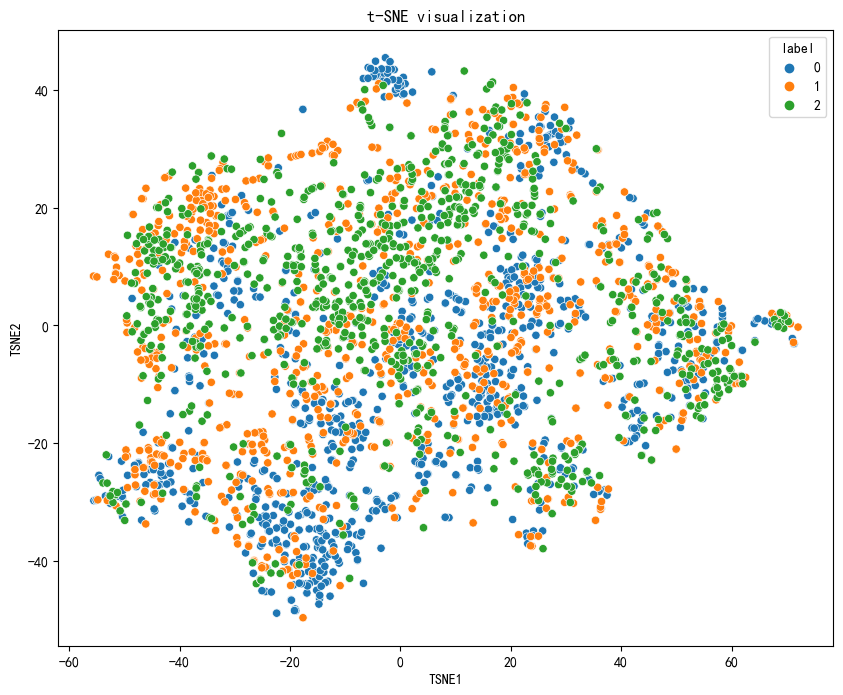

In [79]:
# 分离特征和标签
X = Dataset.drop(columns=['label'])  # 假设特征列是除了 'label' 以外的所有列
y = Dataset['label']

# 使用t-SNE降维
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# 创建一个新的DataFrame来存储降维结果和标签
df_tsne = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['label'] = y

# 绘制t-SNE结果
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='label', palette='tab10', data=df_tsne)
plt.title('t-SNE visualization')
plt.show()

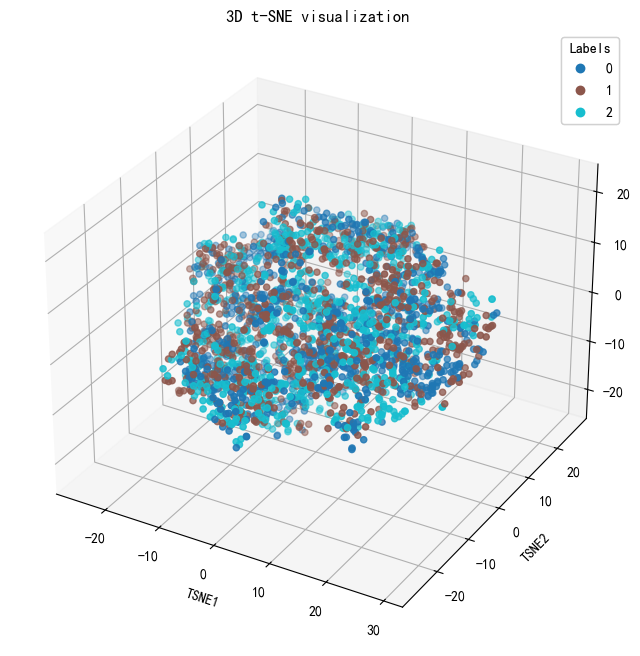

In [16]:
# 分离特征和标签
X = Dataset.drop(columns=['label'])  # 假设特征列是除了 'label' 以外的所有列
y = Dataset['label']

# 使用t-SNE降维到3维
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)

# 创建一个新的DataFrame来存储降维结果和标签
df_tsne = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2', 'TSNE3'])
df_tsne['label'] = y

# 绘制3D t-SNE结果
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 使用不同颜色绘制不同标签的数据点
scatter = ax.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], df_tsne['TSNE3'], c=df_tsne['label'], cmap='tab10')

# 添加图例
legend = ax.legend(*scatter.legend_elements(), title="Labels")
ax.add_artist(legend)

# 设置标题和轴标签
ax.set_title('3D t-SNE visualization')
ax.set_xlabel('TSNE1')
ax.set_ylabel('TSNE2')
ax.set_zlabel('TSNE3')

plt.show()

In [17]:
X.corr()

,1_f1,1_f2,1_f3,1_f4,1_f5,1_f6,1_f7,1_f8,1_f9,1_f10,...,8_f29,8_f30,8_f31,8_f32,8_f33,8_f34,8_f35,8_f36,8_f37,8_f38
1_f1,1.000000,-0.212038,0.117733,-0.242135,0.295285,-0.063000,-0.020504,-0.014756,-0.002900,-0.017031,...,-0.021849,-0.009666,0.009848,-0.028394,-0.016892,0.010148,-0.005572,-0.014636,-0.023944,-0.066303
1_f2,-0.212038,1.000000,-0.299951,0.696157,-0.574449,0.097516,0.051867,0.041325,0.041980,-0.127957,...,0.013163,0.035668,0.020580,0.005720,0.022780,0.006749,0.012900,0.011847,-0.000282,0.218880
1_f3,0.117733,-0.299951,1.000000,-0.301265,0.294116,-0.167376,-0.021384,-0.017554,-0.023614,0.354100,...,-0.144277,-0.178043,-0.090177,-0.131551,-0.167446,-0.103861,-0.032811,-0.072616,-0.132142,-0.027313
1_f4,-0.242135,0.696157,-0.301265,1.000000,-0.704041,0.033188,0.055260,0.049055,0.047799,-0.175026,...,0.032758,0.058711,0.036269,0.027166,0.046858,0.035698,-0.000397,0.006762,0.015648,0.230565
1_f5,0.295285,-0.574449,0.294116,-0.704041,1.000000,-0.009471,-0.084383,-0.057884,-0.058177,0.184175,...,-0.078789,-0.047658,-0.064456,-0.103164,-0.077492,-0.049263,-0.018962,-0.051250,-0.088571,0.137798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8_f34,0.010148,0.006749,-0.103861,0.035698,-0.049263,-0.003125,-0.041988,-0.043571,-0.044480,-0.041637,...,0.721990,0.735382,0.848818,0.743577,0.750384,1.000000,0.048052,0.313554,0.703121,-0.227165
8_f35,-0.005572,0.012900,-0.032811,-0.000397,-0.018962,-0.025660,-0.034653,-0.033999,-0.033811,-0.021037,...,0.109689,0.080412,0.041962,0.053879,0.048896,0.048052,1.000000,0.931568,0.362365,-0.005741
8_f36,-0.014636,0.011847,-0.072616,0.006762,-0.051250,-0.026196,-0.047418,-0.050671,-0.048024,-0.036675,...,0.416120,0.370947,0.293734,0.362456,0.336245,0.313554,0.931568,1.000000,0.657614,-0.084008
8_f37,-0.023944,-0.000282,-0.132142,0.015648,-0.088571,-0.018575,-0.062114,-0.067000,-0.060329,-0.056162,...,0.847950,0.797810,0.666047,0.817165,0.766709,0.703121,0.362365,0.657614,1.000000,-0.215303


<Axes: >

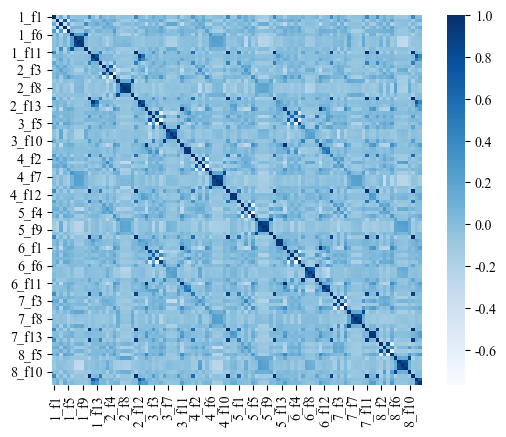

In [106]:
plt.rcParams['font.family'] = 'Times New Roman'
sns.heatmap(X.corr(), annot=False, square=True, fmt='.2f', annot_kws={'size': 6}, cmap='Blues')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


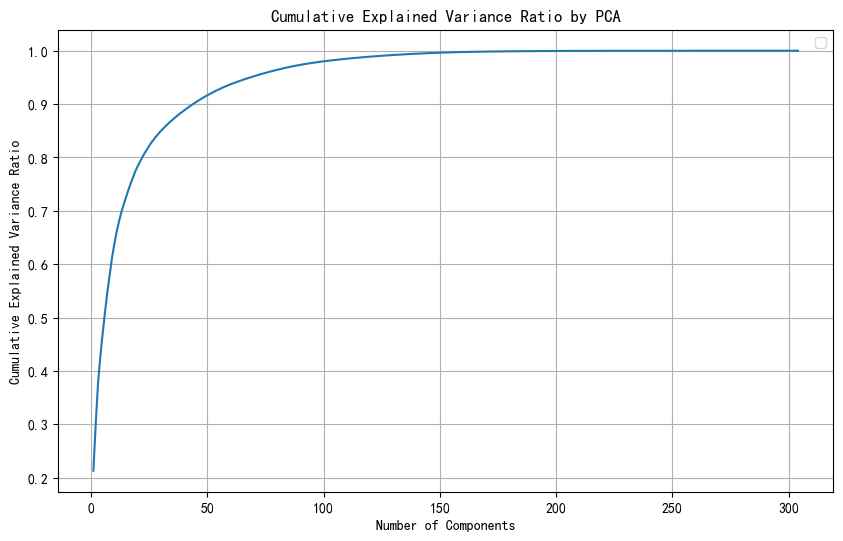

In [80]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def apply_pca(data, n_components=None):
    # 标准化数据
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # 使用PCA进行降维
    pca = PCA(n_components=n_components)
    data_pca = pca.fit_transform(data_scaled)
    
    # 获取累积方差信息比
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
    
    return cumulative_explained_variance_ratio



# 应用PCA并获取累积方差信息比
cumulative_explained_variance_ratio1 = apply_pca(X)


# 绘制累积方差信息比图
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance_ratio1) + 1), cumulative_explained_variance_ratio1)

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by PCA')
plt.legend()
plt.grid(True)
plt.show()


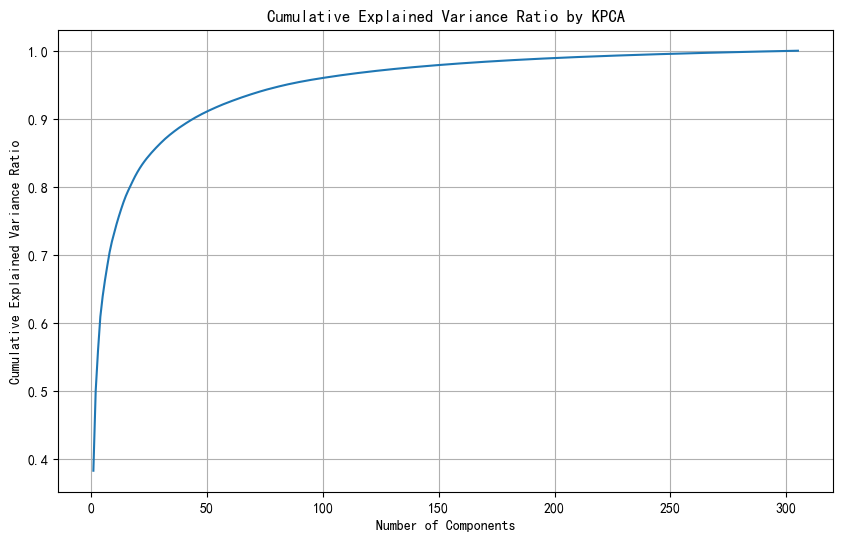

In [64]:
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘cosine’, ‘precomputed’} or callable, default=’linear’
def apply_kpca(data, n_components=None, kernel='rbf', gamma=None):
    # 标准化数据
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # 使用KPCA进行降维
    kpca = KernelPCA(n_components=n_components, kernel=kernel, gamma=gamma)
    data_kpca = kpca.fit_transform(data_scaled)
    
    # 计算特征值并转换为解释的方差比率
    explained_variance = np.var(data_kpca, axis=0)
    explained_variance_ratio = explained_variance / np.sum(explained_variance)
    cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
    
    return cumulative_explained_variance_ratio

# 应用KPCA并获取累积方差信息比
n_components = 305  # 保留的主成分数量
cumulative_explained_variance_ratio2 = apply_kpca(X, n_components=n_components, kernel='rbf', gamma=0.001)

# 绘制累积方差信息比图
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_explained_variance_ratio2)

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by KPCA')
plt.grid(True)
plt.show()


In [81]:
def get_n_components_for_variance(cumulative_explained_variance_ratio, threshold=0.9):
    # 找到累积方差大于阈值所需的最小特征个数
    n_components = np.argmax(cumulative_explained_variance_ratio >= threshold) + 1
    return n_components

n_components1 = get_n_components_for_variance(cumulative_explained_variance_ratio1)#cumulative_explained_variance_ratio1
n_components1

44

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [21]:
from sklearn.feature_selection import RFE
model=RandomForestClassifier()  # 使用随机森林作为评估器
selecter = RFE(estimator=model,n_features_to_select = 44)
selecter.fit(X,Y)
selecter.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False,  True,  True, False, False,
        True,  True, False, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False, False, False, False,  True,
        True, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [22]:
X.columns[selecter.get_support()==True]

Index(['1_f23', '2_f6', '2_f10', '2_f18', '2_f35', '2_f38', '3_f2', '3_f3',
       '3_f6', '3_f7', '3_f10', '3_f11', '3_f12', '3_f14', '3_f15', '3_f16',
       '3_f17', '3_f18', '3_f19', '3_f20', '3_f21', '3_f22', '3_f23', '3_f24',
       '3_f26', '3_f27', '3_f32', '3_f33', '3_f36', '3_f37', '3_f38', '5_f14',
       '5_f32', '6_f2', '6_f3', '6_f6', '6_f7', '6_f10', '6_f11', '6_f12',
       '6_f13', '6_f14', '6_f15', '6_f16', '6_f17', '6_f18', '6_f19', '6_f20',
       '6_f21', '6_f22', '6_f23', '6_f24', '6_f25', '6_f28', '6_f31', '6_f32',
       '6_f33', '6_f36', '6_f37', '6_f38'],
      dtype='object')

In [49]:
X1=X[['1_f23', '2_f6', '2_f10', '2_f18', '2_f35', '2_f38', '3_f2', '3_f3',
       '3_f6', '3_f7', '3_f10', '3_f11', '3_f12', '3_f14', '3_f15', '3_f16',
       '3_f17', '3_f18', '3_f19', '3_f20', '3_f21', '3_f22', '3_f23', '3_f24',
       '3_f26', '3_f27', '3_f32', '3_f33', '3_f36', '3_f37', '3_f38', '5_f14',
       '5_f32', '6_f2', '6_f3', '6_f6', '6_f7', '6_f10', '6_f11', '6_f12',
       '6_f13', '6_f14', '6_f15', '6_f16', '6_f17', '6_f18', '6_f19', '6_f20',
       '6_f21', '6_f22', '6_f23', '6_f24', '6_f25', '6_f28', '6_f31', '6_f32',
       '6_f33', '6_f36', '6_f37', '6_f38']]

In [83]:
# 分离数据集
validation_size = 0.2
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=validation_size, random_state=seed)

In [84]:
model_list = [
    DecisionTreeClassifier(),
    SVC(probability=True),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(n_estimators=100),
    LGBMClassifier(n_estimators=100),
    ExtraTreesClassifier(n_estimators=100),
    MLPClassifier()
]
model_names = ['DT', 'SVC', 'KNN', 'RF', 'GBDT', 'XGB',
               'LGB', 'ETR', 'MLP']

In [85]:
import pandas as pd
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# 初始化性能指标列表
results = []

# 定义5折交叉验证
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 遍历模型列表
for model, name in zip(model_list, model_names):
    # 定义评价指标
    scoring = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score, average='weighted'),
        'recall': make_scorer(recall_score, average='weighted'),
        'f1': make_scorer(f1_score, average='weighted')
    }

    # 使用交叉验证评估模型
    scores = cross_validate(model, X_train, y_train, cv=cv, scoring=scoring, return_train_score=False)

    # 计算平均性能指标
    results.append({
        'Model': name,
        'Accuracy': scores['test_accuracy'].mean(),
        'Precision': scores['test_precision'].mean(),
        'Recall': scores['test_recall'].mean(),
        'F1 Score': scores['test_f1'].mean()
    })

    print(f'{name}方法的5折交叉验证准确率为{round(scores["test_accuracy"].mean(), 3)}')

# 创建DataFrame
df_results = pd.DataFrame(results)

# 打印结果
print(df_results)


DT方法的5折交叉验证准确率为0.689
SVC方法的5折交叉验证准确率为0.689
KNN方法的5折交叉验证准确率为0.609
RF方法的5折交叉验证准确率为0.828
GBDT方法的5折交叉验证准确率为0.837


c:\Ananconda\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Ananconda\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Ananconda\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Ananconda\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
c:\Ananconda\Lib\site-packages\xgboost\data.py:52

XGB方法的5折交叉验证准确率为0.869
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007775 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 77293
[LightGBM] [Info] Number of data points in the train set: 1728, number of used features: 304
[LightGBM] [Info] Start training from score -1.112599
[LightGBM] [Info] Start training from score -1.074597
[LightGBM] [Info] Start training from score -1.109084
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 77300
[LightGBM] [Info] Number of data points in the train set: 1728, number of used features: 304
[LightGBM] [Info] Start training from score -1.112599
[LightGBM] [Info] Start training from score -1.074597
[LightGBM] [Info] Start training from score -1.109084
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of 

c:\Ananconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Ananconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Ananconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Ananconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP方法的5折交叉验证准确率为0.734
  Model  Accuracy  Precision    Recall  F1 Score
0    DT  0.689352   0.694064  0.689352  0.690712
1   SVC  0.689352   0.685798  0.689352  0.677873
2   KNN  0.608796   0.607848  0.608796  0.607168
3    RF  0.827778   0.828468  0.827778  0.827541
4  GBDT  0.837037   0.837634  0.837037  0.836972
5   XGB  0.869444   0.870835  0.869444  0.869501
6   LGB  0.878241   0.879865  0.878241  0.878108
7   ETR  0.842130   0.843756  0.842130  0.841319
8   MLP  0.733796   0.733265  0.733796  0.731807


c:\Ananconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [41]:
df_results

,Model,Accuracy,Precision,Recall,F1 Score
0,DT,0.731019,0.732179,0.731019,0.730885
1,SVC,0.682870,0.676291,0.682870,0.673519
2,KNN,0.650463,0.648132,0.650463,0.647738
3,RF,0.834722,0.835709,0.834722,0.834599
4,GBDT,0.809259,0.809522,0.809259,0.808918
5,XGB,0.844907,0.845538,0.844907,0.844456
6,LGB,0.855556,0.855958,0.855556,0.855320
7,ETR,0.867593,0.868534,0.867593,0.867148
8,MLP,0.701852,0.698371,0.701852,0.697775


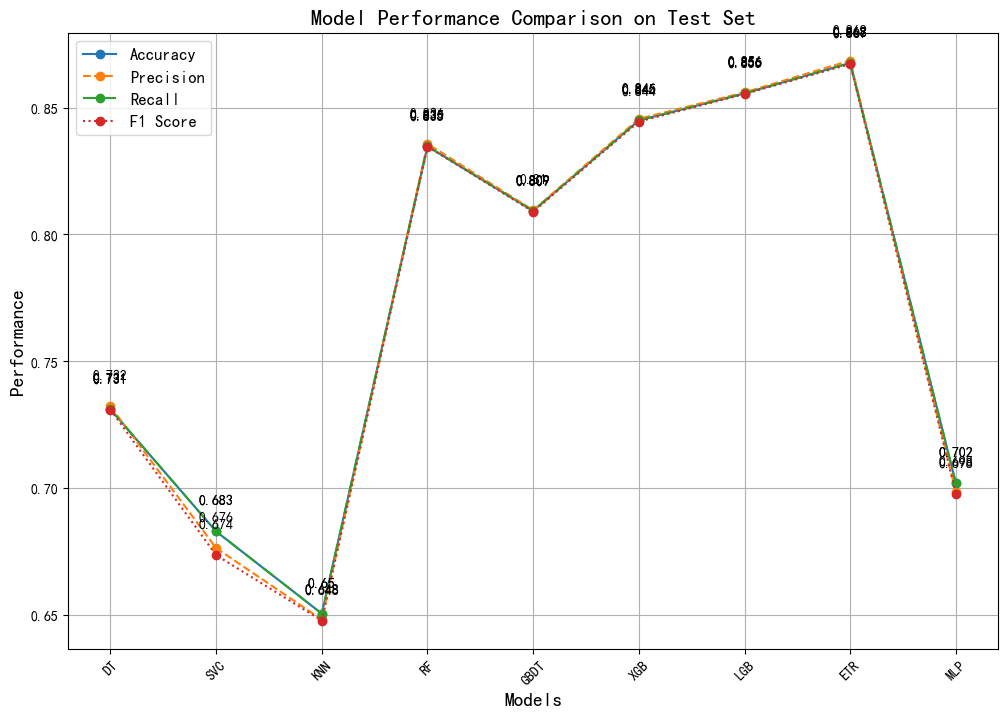

In [42]:
# 创建折线图
plt.figure(figsize=(12, 8))
index = np.arange(len(df_results))
bar_width = 0.15

# 不同的线形
line_styles = ['-', '--', '-.', ':', '-', '--']

# 防止标注的数据重叠
offset = 0.01

# 绘制折线图
for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1 Score']):
    plt.plot(index, df_results[metric], linestyle=line_styles[i], marker='o', label=metric)

    # 调整标注位置
    for x, y in zip(index, df_results[metric]):
        plt.text(x, y + offset, f'{round(y, 3)}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Models', fontsize=14)
plt.ylabel('Performance', fontsize=14)
plt.title('Model Performance Comparison on Test Set', fontsize=16)
plt.xticks(index, df_results['Model'], fontsize=10, rotation=45)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


# Stacking

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 引入用到的分类算法
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
from mlxtend.classifier import StackingClassifier


# 引入要用到的评价函数
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [32]:
# 导入
warnings.filterwarnings("ignore")

X_train_fit=X_train
X_test_fit=X_test

In [33]:
# LogisticRegression
svc = SVC(probability=True)

# ET
etc = ExtraTreesClassifier()

# 随机森林
rfc = RandomForestClassifier()


# xgboost
xgbc = XGBClassifier()# learning_rate=0.1,max_depth=3, random_state=42

# lightgbm
lgbc = LGBMClassifier()


In [34]:
sclf = StackingClassifier(classifiers=[svc,etc],
                          meta_classifier=svc)

# 定义一个包含多个评价指标的函数
sclf.fit(X_train_fit, y_train)
y_predict = sclf.predict(X_test_fit)
pre_proba=sclf.predict_proba(X_test_fit)[:,1]
# precision, recall, f1, _ = classification_report(y_test, (pre_proba > 0.5).astype(int), output_dict=True)['1'].values()
print("准确率",accuracy_score(y_test,y_predict))
print("精确率",precision_score(y_test,y_predict,average='weighted'))
print("召回率",recall_score(y_test,y_predict,average='weighted'))
print("F1-score",f1_score(y_test,y_predict,average='weighted'))
# print("AUC",roc_auc_score(y_test,pre_proba))


准确率 0.8740740740740741
精确率 0.8740199583613032
召回率 0.8740740740740741
F1-score 0.8740425451092119


In [35]:
sclf

StackingClassifier(classifiers=[SVC(probability=True), ExtraTreesClassifier()],
                   meta_classifier=SVC(probability=True))

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 忽略警告
import warnings
warnings.filterwarnings("ignore")

# 数据预处理
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 定义基本模型
etc = ExtraTreesClassifier()
rfc = RandomForestClassifier()
xgbc = XGBClassifier()
lgbc = LGBMClassifier()

# 定义Stacking模型
sclf = StackingClassifier(classifiers=[etc, rfc, xgbc, lgbc], meta_classifier=etc)

for clf in [etc, rfc, xgbc, lgbc]:
    scores = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"{clf.__class__.__name__} 交叉验证准确率: {np.mean(scores)}")

# 交叉验证
cv_scores = cross_val_score(sclf, X_train_scaled, y_train, cv=StratifiedKFold(5), scoring='accuracy')

# 输出交叉验证的平均性能
print("交叉验证准确率:", np.mean(cv_scores))

# 训练Stacking模型
sclf.fit(X_train_scaled, y_train)

# 测试集性能
y_predict = sclf.predict(X_test_scaled)
print("测试集准确率:", accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))


ExtraTreesClassifier 交叉验证准确率: 0.8652777777777777
RandomForestClassifier 交叉验证准确率: 0.8310185185185185
XGBClassifier 交叉验证准确率: 0.8486111111111111
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22185
[LightGBM] [Info] Number of data points in the train set: 1728, number of used features: 87
[LightGBM] [Info] Start training from score -1.112599
[LightGBM] [Info] Start training from score -1.074597
[LightGBM] [Info] Start training from score -1.109084
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22185
[LightGBM] [Info] Number of data points in the train set: 1728, number of used features: 87
[LightGBM] [Info] Start training from score -1.112599
[LightGBM] [Info] Start training from score -1.074597
[LightGBM]

In [37]:
print("测试集准确率:", accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

测试集准确率: 0.8796296296296297
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       190
           1       0.81      0.85      0.83       163
           2       0.87      0.88      0.87       187

    accuracy                           0.88       540
   macro avg       0.88      0.88      0.88       540
weighted avg       0.88      0.88      0.88       540



In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# 忽略警告
import warnings
warnings.filterwarnings("ignore")

# 定义基本模型
# lr = LogisticRegression(C=1, max_iter=100, penalty='l2', solver='liblinear', tol=0.0001, random_state=42)
svc = SVC(probability=True)
etc = ExtraTreesClassifier()
rfc = RandomForestClassifier()
xgbc = XGBClassifier()
lgbc = LGBMClassifier()

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.2, random_state=42)

# 定义Stacking模型
sclf = StackingClassifier(classifiers=[etc, svc], meta_classifier=svc)

# 交叉验证
cv_scores = cross_val_score(sclf, X_train, y_train, cv=5, scoring='accuracy')  # 选择适当的评价指标

# 输出交叉验证的平均性能
print("交叉验证准确率:", np.mean(cv_scores))

# 训练Stacking模型
sclf.fit(X_train, y_train)

# 训练集性能
y_train_predict = sclf.predict(X_train)
train_pre_proba = sclf.predict_proba(X_train)[:, 1]

print("训练集准确率:", accuracy_score(y_train, y_train_predict))
print("训练集精确率:", precision_score(y_train, y_train_predict,average='weighted'))
print("训练集召回率:", recall_score(y_train, y_train_predict,average='weighted'))
print("训练集F1-score:", f1_score(y_train, y_train_predict,average='weighted'))
# print("训练集AUC:", roc_auc_score(y_train, train_pre_proba))
print("训练集混淆矩阵:")
print(confusion_matrix(y_train, y_train_predict))
print("训练集分类报告:")
print(classification_report(y_train, y_train_predict))

# 测试集性能
y_test_predict = sclf.predict(X_test)
test_pre_proba = sclf.predict_proba(X_test)[:, 1]
print("测试集准确率:", accuracy_score(y_test, y_test_predict))
print("测试集精确率:", precision_score(y_test, y_test_predict,average='weighted'))
print("测试集召回率:", recall_score(y_test, y_test_predict,average='weighted'))
print("测试集F1-score:", f1_score(y_test, y_test_predict,average='weighted'))
# print("测试集AUC:", roc_auc_score(y_test, test_pre_proba))
print("测试集混淆矩阵:")
print(confusion_matrix(y_test, y_test_predict))
print("测试集分类报告:")
print(classification_report(y_test, y_test_predict))



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22185
[LightGBM] [Info] Number of data points in the train set: 1728, number of used features: 87
[LightGBM] [Info] Start training from score -1.112599
[LightGBM] [Info] Start training from score -1.074597
[LightGBM] [Info] Start training from score -1.109084
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22185
[LightGBM] [Info] Number of data points in the train set: 1728, number of used features: 87
[LightGBM] [Info] Start training from score -1.112599
[LightGBM] [Info] Start training from score -1.074597
[LightGBM] [Info] Start training from score -1.109084
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002671 sec

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# 忽略警告
import warnings
warnings.filterwarnings("ignore")

# 定义基本模型
# lr = LogisticRegression(C=1, max_iter=100, penalty='l2', solver='liblinear', tol=0.0001,random_state=42)
svc = SVC(probability=True)
etc = ExtraTreesClassifier()
rfc = RandomForestClassifier()
xgbc = XGBClassifier()
lgbc = LGBMClassifier()

# 定义Stacking模型
sclf = StackingClassifier(classifiers=[etc, svc], meta_classifier=svc)

# # 交叉验证
# cv_scores = cross_val_score(sclf, X_train, y_train, cv=5, scoring='accuracy')  # 选择适当的评价指标

# # 输出交叉验证的平均性能
# print("交叉验证准确率:", np.mean(cv_scores))

# 训练Stacking模型
sclf.fit(X_train, y_train)

# 测试集性能
y_predict = sclf.predict(X_test)
pre_proba = sclf.predict_proba(X_test)[:, 1]
print("测试集准确率:", accuracy_score(y_test, y_predict))
print("测试集精确率:", precision_score(y_test, y_predict,average='weighted'))
print("测试集召回率:", recall_score(y_test, y_predict,average='weighted'))
print("测试集F1-score:", f1_score(y_test, y_predict,average='weighted'))
# print("测试集AUC:", roc_auc_score(y_test, pre_proba))
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test,y_predict))

测试集准确率: 0.8703703703703703
测试集精确率: 0.8708325775818035
测试集召回率: 0.8703703703703703
测试集F1-score: 0.8705619412515964
[[175  10   5]
 [  7 133  23]
 [  5  20 162]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       190
           1       0.82      0.82      0.82       163
           2       0.85      0.87      0.86       187

    accuracy                           0.87       540
   macro avg       0.87      0.87      0.87       540
weighted avg       0.87      0.87      0.87       540



In [39]:
print(confusion_matrix(y_test, y_predict))

[[175  10   5]
 [  7 133  23]
 [  5  20 162]]


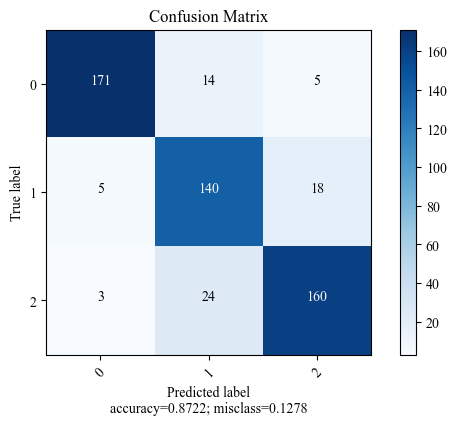

<Figure size 640x480 with 0 Axes>

In [75]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(6, 4))
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
plot_confusion_matrix(cm           = np.array([[171, 14, 5],
                                               [5, 140, 18],
                                               [3, 24, 160]]), 
                      normalize    = False,
                      target_names = ['0', '1','2'],
                      title        = "Confusion Matrix")
plt.savefig('cofusion.svg')